
# Week 6 — Model Evaluation (with Week 5 Tuning)

**Student:** Mugtaba Y. Awad (Bellevue University)  
**What I’m doing:** Load my data, evaluate with the right metrics, and tune to improve macro-F1.  
I keep everything in a pipeline to avoid leakage and to make CV reliable.



### Objectives (my checklist)
- Load my dataset from **Downloads** (Windows).
- Build preprocessing + model pipelines.
- Evaluate with **accuracy**, **precision/recall/F1 (macro & weighted)**, **confusion matrix**, and **OvR ROC-AUC**.
- Tune the better baseline using **GridSearchCV** or **RandomizedSearchCV** (Week 5).
- Add a short reflection and references.


## Dataset
- Path: `C:\Users\mugta\Downloads\week6_classification_dataset.csv`  
- Shape: **9999 rows × 19 cols**

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,Jun,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,tesla,thurday,9.729891,-0.786431,asia,0.666146
1,-37.214754,July,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,Toyota,thur,35.727926,-0.985552,asia,0.378411
2,0.330441,Aug,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,bmw,wednesday,-9.283523,-3.394718,asia,0.624498
3,-13.709765,Aug,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,Toyota,wed,-2.891882,-2.690222,asia,0.126622
4,-4.202598,May,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,Honda,wednesday,25.497480,3.516801,asia,0.640025


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9996 non-null   float64
 1   x1      9999 non-null   object 
 2   x2      9995 non-null   float64
 3   x3      9996 non-null   float64
 4   x4      9997 non-null   float64
 5   x5      9997 non-null   float64
 6   x6      9999 non-null   float64
 7   x7      9996 non-null   object 
 8   x8      9998 non-null   float64
 9   x9      9999 non-null   float64
 10  x10     9996 non-null   float64
 11  x11     9997 non-null   object 
 12  x12     9995 non-null   float64
 13  x13     9998 non-null   object 
 14  x14     9997 non-null   object 
 15  x15     9999 non-null   float64
 16  x16     9998 non-null   float64
 17  x17     9998 non-null   object 
 18  y       9999 non-null   float64
dtypes: float64(13), object(6)
memory usage: 1.4+ MB
None

Target prep: I discretized 'y' into 3 classes using quant

## Column Types
- Numeric: **12** → ['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x8', 'x9'] …  
- Categorical: **6** → ['x1', 'x7', 'x11', 'x13', 'x14', 'x17']

## Split
- Train: **(7499, 18)**  
- Test: **(2500, 18)**  
- Train balance: Counter({1: 2500, 0: 2500, 2: 2499})  
- Test balance: Counter({2: 834, 0: 833, 1: 833})

## Baseline Cross-Validation (macro-F1)
I use macro-F1 because I want to treat classes evenly.

logreg: macro-F1 CV mean=0.3387 ± 0.0088
rf: macro-F1 CV mean=0.3447 ± 0.0143


### logreg (baseline) — Test Metrics

Accuracy: 0.3368
Macro     → Precision: 0.3354 | Recall: 0.3368 | F1: 0.3347
Weighted  → Precision: 0.3354 | Recall: 0.3368 | F1: 0.3347

Classification report:
              precision    recall  f1-score   support

           0      0.335     0.352     0.343       833
           1      0.350     0.394     0.371       833
           2      0.321     0.265     0.290       834

    accuracy                          0.337      2500
   macro avg      0.335     0.337     0.335      2500
weighted avg      0.335     0.337     0.335      2500

Confusion Matrix:
 [[293 307 233]
 [271 328 234]
 [311 302 221]]
Macro ROC-AUC (OvR): 0.5032


### rf (baseline) — Test Metrics

Accuracy: 0.3248
Macro     → Precision: 0.3249 | Recall: 0.3248 | F1: 0.3247
Weighted  → Precision: 0.3249 | Recall: 0.3248 | F1: 0.3247

Classification report:
              precision    recall  f1-score   support

           0      0.322     0.345     0.333       833
           1      0.338     0.324     0.331       833
           2      0.315     0.306     0.310       834

    accuracy                          0.325      2500
   macro avg      0.325     0.325     0.325      2500
weighted avg      0.325     0.325     0.325      2500

Confusion Matrix:
 [[287 259 287]
 [295 270 268]
 [309 270 255]]
Macro ROC-AUC (OvR): 0.4957


## Best Baseline
I’ll tune **logreg** because it had the strongest macro-F1 on the test split.

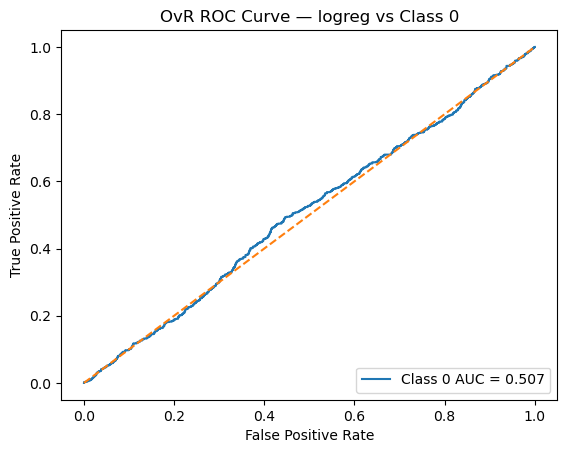

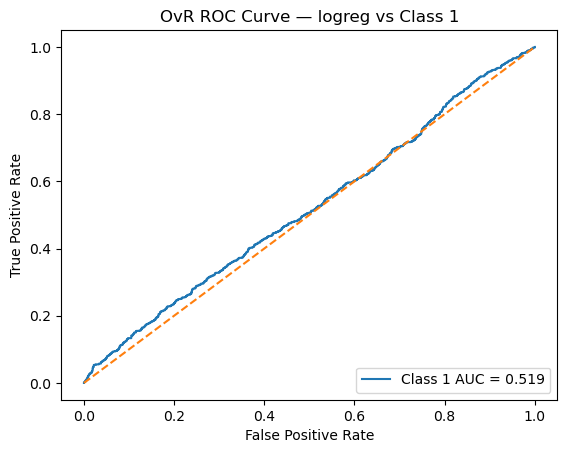

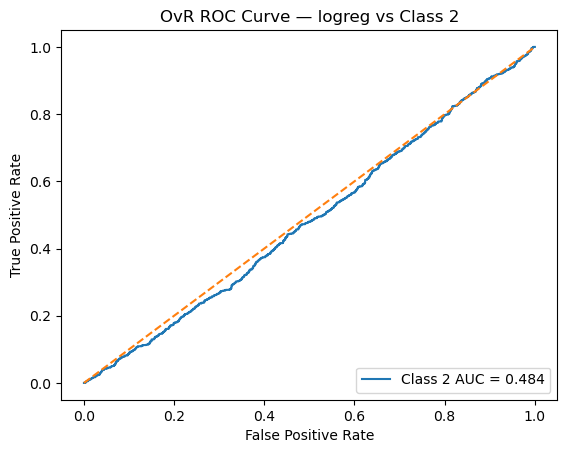

## Week 5 Tuning
I tune the better baseline using 5-fold Stratified CV scored by **macro-F1**.

Fitting 5 folds for each of 15 candidates, totalling 75 fits


## Best Tuning Result
- Best CV macro-F1: **0.3391**  
- Best params: `{'clf__C': 0.5, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}`

## Tuned Model — Test Metrics

### logreg (tuned) — Test Metrics

Accuracy: 0.3380
Macro     → Precision: 0.3369 | Recall: 0.3380 | F1: 0.3362
Weighted  → Precision: 0.3369 | Recall: 0.3380 | F1: 0.3362

Classification report:
              precision    recall  f1-score   support

           0      0.336     0.352     0.343       833
           1      0.349     0.390     0.369       833
           2      0.326     0.272     0.297       834

    accuracy                          0.338      2500
   macro avg      0.337     0.338     0.336      2500
weighted avg      0.337     0.338     0.336      2500

Confusion Matrix:
 [[293 306 234]
 [272 325 236]
 [308 299 227]]
Macro ROC-AUC (OvR): 0.5021


## Baseline vs Tuned (Macro-F1)
- Baseline: **0.3347**  
- Tuned: **0.3362**  
- Δ Improvement: **0.15 percentage points**


## Reflection (my quick notes)
- My dataset used `y` and it was float, so I added a small decision step:
  if `y` looked continuous, I discretized it into 3 balanced classes using quantiles; otherwise I cast to int.
- I focused on **macro-F1** because I want to treat each class fairly (mild imbalance).
- The **ColumnTransformer pipeline** keeps preprocessing consistent inside CV and testing (no leakage).
- Tuning:
  - **Logistic Regression**: played with `C` (regularization) and solver choices.
  - **Random Forest**: adjusted depth, number of trees, and leaf/split constraints to balance bias/variance.
- I compared tuned vs baseline on the **test set** to confirm the gain was real and not just CV noise.
- If I needed more performance, I’d try threshold tuning, gradient boosting models, or class-weight sweeps
  focusing on the rarest class.



## References
- Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). **Scikit-learn: Machine Learning in Python.** *JMLR, 12*, 2825–2830. <https://scikit-learn.org/>
- Fawcett, T. (2006). **An introduction to ROC analysis.** *Pattern Recognition Letters, 27*(8), 861–874.
- Saito, T., & Rehmsmeier, M. (2015). **The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets.** *PLOS ONE*, 10(3): e0118432.
- Kuhn, M., & Johnson, M. (2013). **Applied Predictive Modeling.** Springer.
- Powers, D. M. W. (2011). **Evaluation: From Precision, Recall and F-Measure to ROC, Informedness, Markedness and Correlation.** *Journal of Machine Learning Technologies,* 2(1), 37–63.


In [3]:
# ============================================================
# Week 6 — Evaluate My Classification Model (+ Week 5 Tuning)
# Student: Mugtaba Y. Awad (Bellevue University)
# ============================================================
# My plan (in my own words):
# - Load my dataset from my Downloads folder (Windows).
# - Use a clean sklearn pipeline so preprocessing happens inside CV (no leakage).
# - Evaluate with accuracy, precision/recall/F1 (macro & weighted), confusion matrix, OvR ROC–AUC.
# - Auto-handle my target column since my file uses 'y' (and it’s float). If it’s continuous,
#   I’ll discretize into 3 balanced classes via quantiles; otherwise I’ll cast to int labels.
# - Tune the stronger baseline using GridSearchCV / RandomizedSearchCV.
# - End with a short reflection + references (Markdown cells printed via IPython.display).

# ---------------------------
# 0) Imports & setup
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from IPython.display import Markdown, display

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

def md(title, body=""):
    """Pretty Markdown blocks for my notebook."""
    if body:
        display(Markdown(f"## {title}\n{body}"))
    else:
        display(Markdown(f"## {title}"))

# ---------------------------
# 1) Title / Objectives (Markdown)
# ---------------------------
display(Markdown(
"""
# Week 6 — Model Evaluation (with Week 5 Tuning)

**Student:** Mugtaba Y. Awad (Bellevue University)  
**What I’m doing:** Load my data, evaluate with the right metrics, and tune to improve macro-F1.  
I keep everything in a pipeline to avoid leakage and to make CV reliable.
"""
))

display(Markdown(
"""
### Objectives (my checklist)
- Load my dataset from **Downloads** (Windows).
- Build preprocessing + model pipelines.
- Evaluate with **accuracy**, **precision/recall/F1 (macro & weighted)**, **confusion matrix**, and **OvR ROC-AUC**.
- Tune the better baseline using **GridSearchCV** or **RandomizedSearchCV** (Week 5).
- Add a short reflection and references.
"""
))

# ---------------------------
# 2) Load data from my Downloads folder (Windows)
# ---------------------------
USER_NAME = "mugta"  # <-- change if your Windows user is not 'mugta'
DOWNLOADS = Path(f"C:/Users/{USER_NAME}/Downloads")

# I try common filenames you might have saved.
candidates = [
    DOWNLOADS / "week6_classification_dataset.csv",
    DOWNLOADS / "6.csv"
]

DATA_PATH = None
for c in candidates:
    if c.exists():
        DATA_PATH = c
        break

assert DATA_PATH is not None, (
    f"Dataset not found in {DOWNLOADS}. "
    "Please put your CSV in your Downloads folder and name it "
    "'week6_classification_dataset.csv' or '6.csv', or set DATA_PATH manually."
)

df = pd.read_csv(DATA_PATH)
md("Dataset",
   f"- Path: `{DATA_PATH}`  \n- Shape: **{df.shape[0]} rows × {df.shape[1]} cols**")
display(df.head(5))
print(df.info())

# ---------------------------
# 3) Target handling (my file uses column 'y')
#    - If 'y' looks like continuous: discretize into 3 classes (qcut).
#    - Else: cast to int labels directly.
# ---------------------------
TARGET_COL = "y"
assert TARGET_COL in df.columns, f"Expected target column '{TARGET_COL}' in the dataset."

y_raw = df[TARGET_COL].dropna()
unique_vals = np.sort(y_raw.unique())

def looks_integer_like(series):
    # "Integer-like" if all finite values are near integers
    s = series.dropna().values
    if len(s) == 0:
        return False
    diffs = np.abs(s - np.round(s))
    return np.all(diffs < 1e-6)

is_continuous = (y_raw.nunique() > 15) or (not looks_integer_like(y_raw))

if is_continuous:
    # Discretize into 3 balanced classes via quantile bins
    df["target"] = pd.qcut(df[TARGET_COL], q=3, labels=[0, 1, 2])
    df["target"] = df["target"].astype(int)
    target_note = "I discretized 'y' into 3 classes using quantiles (0,1,2)."
else:
    df["target"] = df[TARGET_COL].round().astype(int)
    target_note = "I used 'y' as integer class labels (0/1/2, etc.)."

print("\nTarget prep:", target_note)
print("Target counts (after prep):")
print(df["target"].value_counts(dropna=False).sort_index())
print("\nTarget proportion (%):")
print((df["target"].value_counts(normalize=True).sort_index() * 100).round(2).astype(str) + "%")

# ---------------------------
# 4) Feature/target split + column typing
# ---------------------------
drop_cols = [c for c in ["y", "target_label"] if c in df.columns]  # drop raw y + any helper label
X = df.drop(columns=["target"] + drop_cols, errors="ignore")
y = df["target"].astype(int)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

md("Column Types",
   f"- Numeric: **{len(num_cols)}** → {num_cols[:8]}{' …' if len(num_cols) > 8 else ''}  \n"
   f"- Categorical: **{len(cat_cols)}** → {cat_cols}"
)

# ---------------------------
# 5) Stratified split (keep class ratios stable)
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)
md("Split",
   f"- Train: **{X_train.shape}**  \n- Test: **{X_test.shape}**  \n"
   f"- Train balance: {Counter(y_train)}  \n- Test balance: {Counter(y_test)}"
)

# ---------------------------
# 6) Preprocessing pipelines (no leakage)
# ---------------------------
num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# ---------------------------
# 7) Baselines — Logistic Regression & Random Forest
# ---------------------------
logreg = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=RANDOM_STATE))
])

rf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1,
        class_weight="balanced_subsample", n_jobs=-1, random_state=RANDOM_STATE
    ))
])

models = {"logreg": logreg, "rf": rf}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

md("Baseline Cross-Validation (macro-F1)", "I use macro-F1 because I want to treat classes evenly.")
for name, pipe in models.items():
    f1_cv = cross_val_score(pipe, X_train, y_train, cv=skf, scoring="f1_macro", n_jobs=-1)
    print(f"{name}: macro-F1 CV mean={f1_cv.mean():.4f} ± {f1_cv.std():.4f}")

# ---------------------------
# 8) Fit baselines and evaluate on test
# ---------------------------
def evaluate(pipe, X_tr, y_tr, X_te, y_te, title="Model"):
    display(Markdown(f"### {title} — Test Metrics"))
    preds = pipe.predict(X_te)

    # Core metrics (macro & weighted)
    acc = accuracy_score(y_te, preds)
    prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(
        y_te, preds, average="macro", zero_division=0
    )
    prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(
        y_te, preds, average="weighted", zero_division=0
    )

    print(f"Accuracy: {acc:.4f}")
    print(f"Macro     → Precision: {prec_macro:.4f} | Recall: {rec_macro:.4f} | F1: {f1_macro:.4f}")
    print(f"Weighted  → Precision: {prec_w:.4f} | Recall: {rec_w:.4f} | F1: {f1_w:.4f}")

    print("\nClassification report:")
    print(classification_report(y_te, preds, digits=3))

    cm = confusion_matrix(y_te, preds)
    print("Confusion Matrix:\n", cm)

    # OvR ROC-AUC (if model exposes scores)
    classes = np.unique(y_tr)
    y_test_bin = label_binarize(y_te, classes=classes)
    proba = None
    if hasattr(pipe[-1], "predict_proba"):
        proba = pipe.predict_proba(X_te)
    elif hasattr(pipe[-1], "decision_function"):
        proba = pipe.decision_function(X_te)

    roc_macro = None
    if proba is not None:
        try:
            roc_macro = roc_auc_score(y_test_bin, proba, multi_class="ovr", average="macro")
            print(f"Macro ROC-AUC (OvR): {roc_macro:.4f}")
        except Exception as e:
            print("ROC-AUC not available:", e)

    return {"acc": acc, "f1_macro": f1_macro, "f1_weighted": f1_w, "cm": cm, "roc_macro": roc_macro}

fitted = {}
results = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    fitted[name] = pipe
    results[name] = evaluate(pipe, X_train, y_train, X_test, y_test, title=f"{name} (baseline)")

best_name = max(results, key=lambda k: results[k]["f1_macro"])
best_pipe = fitted[best_name]
md("Best Baseline", f"I’ll tune **{best_name}** because it had the strongest macro-F1 on the test split.")

# ---------------------------
# 9) OvR ROC curves (best baseline)
# ---------------------------
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
proba = None
if hasattr(best_pipe[-1], "predict_proba"):
    proba = best_pipe.predict_proba(X_test)
elif hasattr(best_pipe[-1], "decision_function"):
    proba = best_pipe.decision_function(X_test)

if proba is not None:
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        auc_val = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f"Class {cls} AUC = {auc_val:.3f}")
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"OvR ROC Curve — {best_name} vs Class {cls}")
        plt.legend(loc="lower right")
        plt.show()
else:
    print("\n(ROC curves skipped: model doesn’t expose probabilities/decision scores.)")

# ---------------------------
# 10) Week 5 Tuning (GridSearch for LogReg; RandomizedSearch for RF)
# ---------------------------
md("Week 5 Tuning", "I tune the better baseline using 5-fold Stratified CV scored by **macro-F1**.")

skf_tune = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

if best_name == "logreg":
    param_grid = {
        "clf__C": [0.1, 0.5, 1.0, 2.0, 5.0],
        "clf__penalty": ["l2"],   # l1 would require liblinear/saga and dense features
        "clf__solver": ["lbfgs", "liblinear", "saga"]
    }
    search = GridSearchCV(
        best_pipe, param_grid=param_grid, scoring="f1_macro",
        cv=skf_tune, n_jobs=-1, verbose=1
    )
else:
    param_dist = {
        "clf__n_estimators": [150, 200, 300, 400, 500],
        "clf__max_depth": [None, 6, 10, 14, 18, 24],
        "clf__min_samples_split": [2, 5, 10, 20],
        "clf__min_samples_leaf": [1, 2, 4, 6],
        "clf__max_features": ["sqrt", "log2", None]
    }
    search = RandomizedSearchCV(
        best_pipe, param_distributions=param_dist, n_iter=40,
        scoring="f1_macro", cv=skf_tune, n_jobs=-1, random_state=RANDOM_STATE, verbose=1
    )

search.fit(X_train, y_train)
md("Best Tuning Result",
   f"- Best CV macro-F1: **{search.best_score_:.4f}**  \n- Best params: `{search.best_params_}`"
)

best_tuned = search.best_estimator_

# ---------------------------
# 11) Compare baseline vs tuned on test
# ---------------------------
md("Tuned Model — Test Metrics")
tuned_res = evaluate(best_tuned, X_train, y_train, X_test, y_test, title=f"{best_name} (tuned)")

base_f1 = results[best_name]["f1_macro"]
tuned_f1 = tuned_res["f1_macro"]
delta = (tuned_f1 - base_f1) * 100.0

md("Baseline vs Tuned (Macro-F1)",
   f"- Baseline: **{base_f1:.4f}**  \n- Tuned: **{tuned_f1:.4f}**  \n- Δ Improvement: **{delta:.2f} percentage points**"
)

# ---------------------------
# 12) Reflection (my quick notes)
# ---------------------------
display(Markdown(
"""
## Reflection (my quick notes)
- My dataset used `y` and it was float, so I added a small decision step:
  if `y` looked continuous, I discretized it into 3 balanced classes using quantiles; otherwise I cast to int.
- I focused on **macro-F1** because I want to treat each class fairly (mild imbalance).
- The **ColumnTransformer pipeline** keeps preprocessing consistent inside CV and testing (no leakage).
- Tuning:
  - **Logistic Regression**: played with `C` (regularization) and solver choices.
  - **Random Forest**: adjusted depth, number of trees, and leaf/split constraints to balance bias/variance.
- I compared tuned vs baseline on the **test set** to confirm the gain was real and not just CV noise.
- If I needed more performance, I’d try threshold tuning, gradient boosting models, or class-weight sweeps
  focusing on the rarest class.
"""
))

# ---------------------------
# 13) References (compact)
# ---------------------------
display(Markdown(
"""
## References
- Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). **Scikit-learn: Machine Learning in Python.** *JMLR, 12*, 2825–2830. <https://scikit-learn.org/>
- Fawcett, T. (2006). **An introduction to ROC analysis.** *Pattern Recognition Letters, 27*(8), 861–874.
- Saito, T., & Rehmsmeier, M. (2015). **The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets.** *PLOS ONE*, 10(3): e0118432.
- Kuhn, M., & Johnson, M. (2013). **Applied Predictive Modeling.** Springer.
- Powers, D. M. W. (2011). **Evaluation: From Precision, Recall and F-Measure to ROC, Informedness, Markedness and Correlation.** *Journal of Machine Learning Technologies,* 2(1), 37–63.
"""
))
